In [7]:
import pandas as pd
yoy_dir = "~/Projects/strategy-evaluator/output/yoy"
algorithm = "triple-top"

In [8]:
df = pd.read_csv(f"{yoy_dir}/yoy_{algorithm}.csv", delimiter=',', index_col=0)
df = df.sort_values(by='year') # sort from least recent to most recent year
df = df.drop(df.index[-1]) # current year is not complete
display(df)

,performance,ups,downs,limits
year,,,,
1962,0.696721,85,37,109
1963,0.574713,50,37,228
1964,0.583333,49,35,174
1965,0.493827,80,82,230
1966,0.600000,45,30,51
...,...,...,...,...
2018,0.471410,2193,2459,1639
2019,0.574895,2606,1927,2745
2020,0.524375,1635,1483,766


In [9]:
df_pruned = df.loc[df.index > 1980]
display(df_pruned)

,performance,ups,downs,limits
year,,,,
1981,0.472678,173,193,123
1982,0.578947,198,144,57
1983,0.526807,226,203,130
1984,0.471311,345,387,326
1985,0.578626,758,552,750
1986,0.659408,757,391,374
1987,0.471459,446,500,278
1988,0.549423,667,547,886
1989,0.550937,941,767,1027


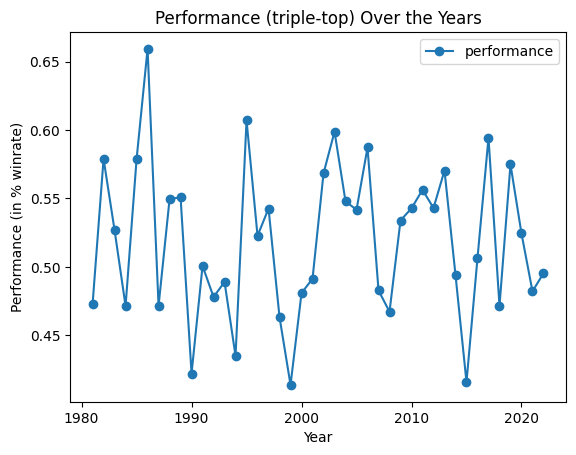

In [10]:
import matplotlib.pyplot as plt

# Plot the performance column against the year column
df_pruned.plot(y='performance', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Show the plot
plt.show()

In [11]:
import numpy as np
from scipy import stats
years = np.array(df_pruned.index)
values = np.array(df_pruned["performance"].values)

slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)

print("Triple Top YoY")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (correlation coefficient): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Triple Top YoY
Slope: -0.0001
Intercept: 0.6652
R-value (correlation coefficient): -0.0160
P-value: 0.9199
Standard error: 0.0007


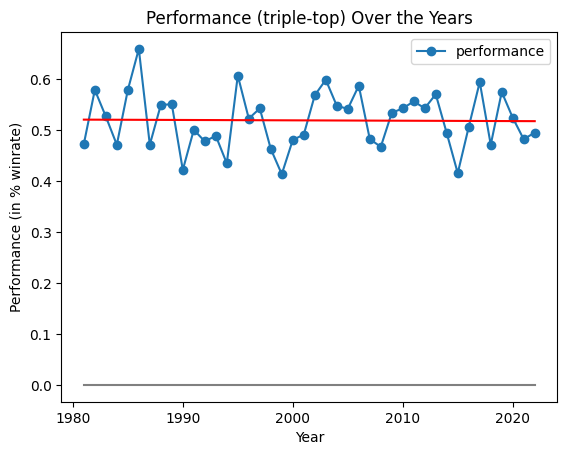

In [12]:
# Plot the DataFrame
df_pruned.plot(y='performance', marker='o')
plt.xlabel('Year')
plt.ylabel('Performance (in % winrate)')
plt.title(f'Performance ({algorithm}) Over the Years')

# Plot the regression line
regression_line = slope * years + intercept
plt.plot(years, regression_line, color='red')
plt.plot(years, 0*years, color='gray')
plt.savefig(f"./figures/yoy_perf_{algorithm}.svg", format="svg")

# Display the plot
plt.show()